In [4]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime Library
from datetime import date

# Helper Functions
import acquire

### Background

#### What is an ETF?
An ETF is a fund can be traded on an exchange like a stock, which means they can be bought and sold throughtout the trading day (unlike mutual funds, which are priced at the end of the trading day).

An ETF is a type of security that tracks an index, sector, commodity or other asset, but which can be purchased or sold on stock exchange the same as a regular stock.

ETF share prices fluctuate all day as the ETF is bought and sold and it is different from mutual funds that only trade once a day after the market closes.
#### How an ETF is structured? 
An ETF can be structured to track anything from the price of an individual commodity to a large and diverse collection of securities. 

ETFs can contain all types of investments including stocks, commodities, or bonds; some offter U.S. only holdings, while other are international. 

???Will the structure of ETF change over time???

### Data Acquisition

In [13]:
%%time
# Create a list of interested stocks
arks = ['ARKK', 'ARKQ', 'ARKW', 'ARKG', 'ARKF']

# Define start and end date
start_date = '2010-01-01'
end_date = date.today()

# Acquire their adjusted closing prices from yahoo finance
df_arks = acquire.acquire_stock_data(arks, 'yahoo', start_date, end_date)

# Inspect the dataframe
print(df_arks.shape)
df_arks.head()

(1626, 5)
CPU times: user 292 ms, sys: 26.8 ms, total: 319 ms
Wall time: 2.48 s


,ARKK,ARKQ,ARKW,ARKG,ARKF
Date,,,,,
2014-09-30,NaN,18.632673,16.704393,NaN,NaN
2014-10-01,NaN,18.290478,16.337547,NaN,NaN
2014-10-02,NaN,18.407051,16.236435,NaN,NaN
2014-10-03,NaN,18.651476,16.829735,NaN,NaN
2014-10-06,NaN,18.529261,16.686008,NaN,NaN


**Takeaways**
1. Those five ETFs have different inception dates.

In [40]:
# Compute the average of the 5 active ETFs

df_arks = df_arks.assign(arks_avg = df_arks.mean(axis=1))
df_arks.tail()

,ARKK,ARKQ,ARKW,ARKG,ARKF,arks_avg
Date,,,,,,
2021-03-10,121.190002,82.589996,150.600006,88.250000,51.680000,98.862001
2021-03-11,128.679993,86.720001,159.399994,93.199997,54.950001,104.589997
2021-03-12,126.680000,86.050003,157.479996,91.800003,54.270000,103.256001
2021-03-15,128.880005,87.620003,160.740005,93.860001,55.189999,105.258002
2021-03-16,126.019997,85.750000,157.929993,92.300003,54.950001,103.389999


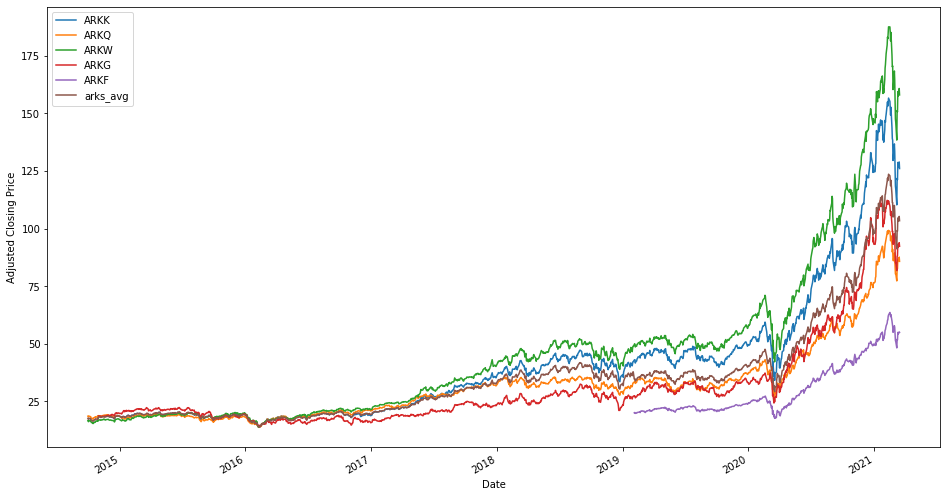

In [59]:
# Plot the adjusted closing prcies over time

df_arks.plot(figsize=(16,9))
plt.ylabel("Adjusted Closing Price")
plt.show()

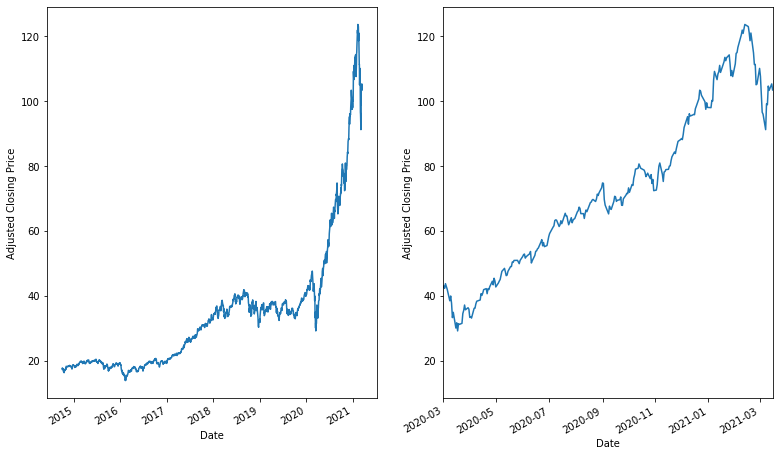

In [72]:
# Plot the mean of the adjusted closing prcies since the beginning of last March

# 
plt.figure(figsize=(13,8))

plt.subplot(121)
df_arks.arks_avg.plot()
plt.ylabel("Adjusted Closing Price")
# Extra plt.show() here will show the two plots in two rows. 

plt.subplot(122)
df_arks.arks_avg.plot()
plt.ylabel("Adjusted Closing Price")
plt.xlim('2020-03-01', end_date)
plt.show()

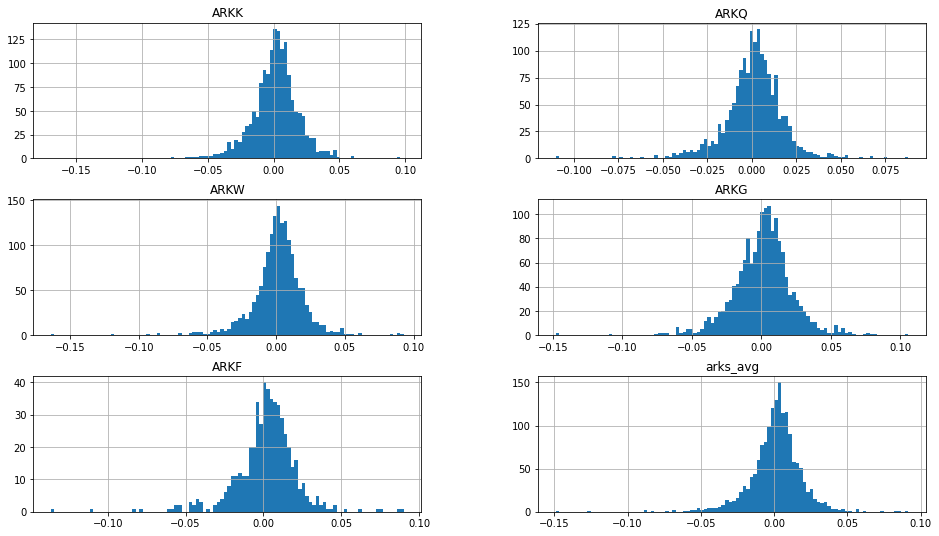

In [42]:
# Compute the daily returns of the ETFs

returns_d = np.log(df_arks/df_arks.shift(1))
returns_d.hist(figsize=(16,9), bins=100)
plt.show()